In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("white")

In [35]:
df = pd.read_excel("attribute_data/att_data.xlsx")

In [36]:
df.head()

,AvgDeg,AvgBet,AvgClo,AvgLoad,AvgKatz,AvgDensity,AvgAlgCon,AvgClustCoff,AvgEig,InstAmp,...,StatRat,MeanCurv,SubgraphStat,1-Zeta,LogKPCARatioChg,NormNMFRatioChg,NormFAbel,NRMS,RMS,Emergence
Nov98,0.475524,1.000000,0.810523,0.475524,0.267132,-0.318532,1.0,-1.000000,0.183689,0.679834,...,0.407864,-0.242635,-1.000000,1.000000,-0.015769,-1.000000,-0.462862,0.000000,0.720535,0.000000
Dec98,-0.027972,0.250903,0.509903,-0.027972,0.096842,-0.419219,1.0,-0.000165,-0.146384,0.305093,...,0.570795,-0.269438,0.766117,-0.766117,-0.038205,-0.535669,-0.278581,0.134533,0.549652,-0.212388
jan_99,0.388112,1.000000,0.785809,0.388112,0.281247,-0.622808,1.0,-1.000000,-0.077805,0.450396,...,0.836955,-0.337965,0.873376,-0.873376,0.023097,-0.718620,-0.221163,0.044101,0.600369,0.417980
feb_99,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,-1.000000,0.875504,1.000000,...,-1.000000,1.000000,0.421859,-0.421859,-0.091706,-0.846725,-1.000000,0.190102,0.882210,1.000000
mar_99,0.559441,1.000000,0.835787,0.559441,0.423150,-0.054825,1.0,-1.000000,0.198663,0.860240,...,0.074177,0.108395,0.763599,-0.763599,0.106766,-0.585848,-0.650293,0.128395,0.681444,-0.969469


In [37]:
mth = df.index.values.tolist()

In [38]:
benchmark = df.columns.tolist()[:9]
benchmark

['AvgDeg',
 'AvgBet',
 'AvgClo',
 'AvgLoad',
 'AvgKatz',
 'AvgDensity',
 'AvgAlgCon',
 'AvgClustCoff',
 'AvgEig']

In [39]:
seismic = df.columns.tolist()[9:20]
seismic.append('MeanCurv')
seismic

['InstAmp',
 'InstPhase',
 'InstFreq',
 'Power',
 'dInstAmp',
 'd2InstAmp',
 'InstAcc',
 'cosInstPhase',
 'A_wt_IF',
 'A_wt_IP',
 'PowerSpecDen',
 'MeanCurv']

In [40]:
music = df.columns.tolist()[21:23]
music

['ZeroCrossRate', 'LogSpecCentroid']

In [41]:
matrix_decomp = df.columns.tolist()[::-1][3:6]
matrix_decomp

['NormFAbel', 'NormNMFRatioChg', 'LogKPCARatioChg']

In [42]:
df_seismic= df[[i for i in seismic]]
df_benchmark= df[[i for i in benchmark]]
df_music= df[[i for i in music]]
df_md= df[[i for i in matrix_decomp]]

In [43]:
df_benchmark.shape[1]

9

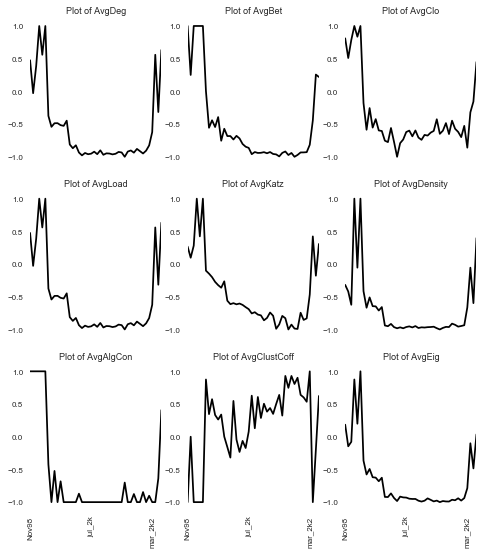

In [44]:
fig = plt.figure(figsize=(8,9))

for i in range(df_benchmark.shape[1]):
    ax = fig.add_subplot(3,3,i+1)
    df_benchmark[benchmark[i]].plot.line(ax=ax, sharex=True, cmap='bone', rot=90, fontsize=8)
    ax.set_xticks(np.arange(len(mth)),[i for i in mth]);
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    ax.set_title("Plot of "+str(benchmark[i]), fontsize=9)
    

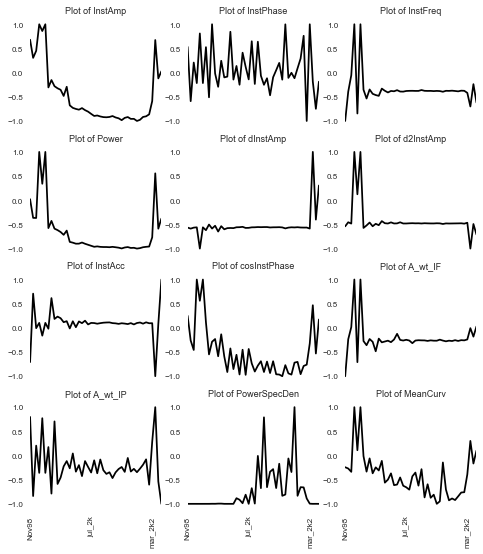

In [45]:
fig = plt.figure(figsize=(8,9))

for i in range(df_seismic.shape[1]):
    ax = fig.add_subplot(4,3,i+1)
    df_seismic[seismic[i]].plot.line(ax=ax, sharex=True, cmap='bone', rot=90, fontsize=8)
    ax.set_xticks(np.arange(len(mth)),mth);
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    ax.set_title("Plot of "+str(seismic[i]), fontsize=9)

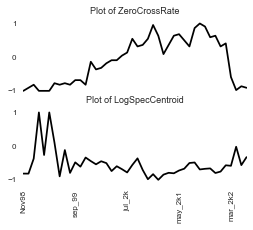

In [46]:
fig = plt.figure(figsize=(4,3))

for i in range(df_music.shape[1]):
    ax = fig.add_subplot(2,1,i+1)
    df_music[music[i]].plot.line(ax=ax, sharex=True, cmap='bone', rot=90, fontsize=8)
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    ax.set_title("Plot of "+str(music[i]), fontsize=9)
    ax.set_xticks(np.arange(len(mth)),[i for i in mth]);

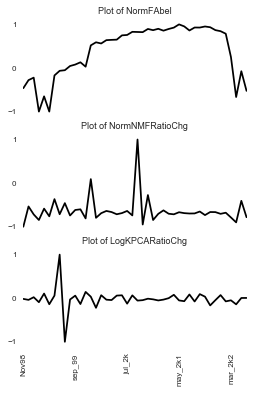

In [47]:
fig = plt.figure(figsize=(4,6))

for i in range(df_md.shape[1]):
    ax = fig.add_subplot(3,1,i+1)
    df_md[matrix_decomp[i]].plot.line(ax=ax, sharex=True, cmap='bone', rot=90, fontsize=8)
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    ax.set_title("Plot of "+str(matrix_decomp[i]), fontsize=9)
    ax.set_xticks(np.arange(len(mth)),[i for i in mth]);

In [48]:
df_md.shape[1]

3

In [49]:
data = pd.read_excel("../Data/data 03.2.xlsx")

In [50]:
years = sorted(set(data.year))
years = years[1:]
years

[1998, 1999, 2000, 2001, 2002]

In [51]:
df_98 = data[data.year==years[0]]
df_99 = data[data.year==years[1]]
df_2k = data[data.year==years[2]]
df_2k1 = data[data.year==years[3]]
df_2k2 = data[data.year==years[4]]

In [52]:
import networkx as nx

In [53]:
def create_graph(df):
    tmp = df.values[:,1:3]
    G= nx.Graph()
    G = nx.from_edgelist(tmp)
    
    return G

In [54]:
jan_99=df_99[df_99.month==1]
feb_99=df_99[df_99.month==2]
mar_99=df_99[df_99.month==3]
apr_99=df_99[df_99.month==4]
may_99=df_99[df_99.month==5]
jun_99=df_99[df_99.month==6]
jul_99=df_99[df_99.month==7]
aug_99=df_99[df_99.month==8]
sep_99=df_99[df_99.month==9]
oct_99=df_99[df_99.month==10]
nov_99=df_99[df_99.month==11]
dec_99=df_99[df_99.month==12]


G_jan_99=create_graph(jan_99)
G_feb_99=create_graph(feb_99)
G_mar_99=create_graph(mar_99)
G_apr_99=create_graph(apr_99)
G_may_99=create_graph(may_99)
G_jun_99=create_graph(jun_99)
G_jul_99=create_graph(jul_99)
G_aug_99=create_graph(aug_99)
G_sep_99=create_graph(sep_99)
G_oct_99=create_graph(oct_99)
G_nov_99=create_graph(nov_99)
G_dec_99=create_graph(dec_99)

In [55]:
jan_2k=df_2k[df_2k.month==1]
feb_2k=df_2k[df_2k.month==2]
mar_2k=df_2k[df_2k.month==3]
apr_2k=df_2k[df_2k.month==4]
may_2k=df_2k[df_2k.month==5]
jun_2k=df_2k[df_2k.month==6]
jul_2k=df_2k[df_2k.month==7]
aug_2k=df_2k[df_2k.month==8]
sep_2k=df_2k[df_2k.month==9]
oct_2k=df_2k[df_2k.month==10]
nov_2k=df_2k[df_2k.month==11]
dec_2k=df_2k[df_2k.month==12]


G_jan_2k=create_graph(jan_2k)
G_feb_2k=create_graph(feb_2k)
G_mar_2k=create_graph(mar_2k)
G_apr_2k=create_graph(apr_2k)
G_may_2k=create_graph(may_2k)
G_jun_2k=create_graph(jun_2k)
G_jul_2k=create_graph(jul_2k)
G_aug_2k=create_graph(aug_2k)
G_sep_2k=create_graph(sep_2k)
G_oct_2k=create_graph(oct_2k)
G_nov_2k=create_graph(nov_2k)
G_dec_2k=create_graph(dec_2k)

In [56]:
jan_2k1=df_2k1[df_2k1.month==1]
feb_2k1=df_2k1[df_2k1.month==2]
mar_2k1=df_2k1[df_2k1.month==3]
apr_2k1=df_2k1[df_2k1.month==4]
may_2k1=df_2k1[df_2k1.month==5]
jun_2k1=df_2k1[df_2k1.month==6]
jul_2k1=df_2k1[df_2k1.month==7]
aug_2k1=df_2k1[df_2k1.month==8]
sep_2k1=df_2k1[df_2k1.month==9]
oct_2k1=df_2k1[df_2k1.month==10]
nov_2k1=df_2k1[df_2k1.month==11]
dec_2k1=df_2k1[df_2k1.month==12]


G_jan_2k1=create_graph(jan_2k1)
G_feb_2k1=create_graph(feb_2k1)
G_mar_2k1=create_graph(mar_2k1)
G_apr_2k1=create_graph(apr_2k1)
G_may_2k1=create_graph(may_2k1)
G_jun_2k1=create_graph(jun_2k1)
G_jul_2k1=create_graph(jul_2k1)
G_aug_2k1=create_graph(aug_2k1)
G_sep_2k1=create_graph(sep_2k1)
G_oct_2k1=create_graph(oct_2k1)
G_nov_2k1=create_graph(nov_2k1)
G_dec_2k1=create_graph(dec_2k1)

In [57]:
jan_2k2=df_2k2[df_2k2.month==1]
feb_2k2=df_2k2[df_2k2.month==2]
mar_2k2=df_2k2[df_2k2.month==3]
apr_2k2=df_2k2[df_2k2.month==4]
may_2k2=df_2k2[df_2k2.month==5]
jun_2k2=df_2k2[df_2k2.month==6]
jul_2k2=df_2k2[df_2k2.month==7]
aug_2k2=df_2k2[df_2k2.month==8]
sep_2k2=df_2k2[df_2k2.month==9]
oct_2k2=df_2k2[df_2k2.month==10]
nov_2k2=df_2k2[df_2k2.month==11]
dec_2k2=df_2k2[df_2k2.month==12]


G_jan_2k2=create_graph(jan_2k2)
G_feb_2k2=create_graph(feb_2k2)
G_mar_2k2=create_graph(mar_2k2)
G_apr_2k2=create_graph(apr_2k2)
G_may_2k2=create_graph(may_2k2)
G_jun_2k2=create_graph(jun_2k2)
G_jul_2k2=create_graph(jul_2k2)
G_aug_2k2=create_graph(aug_2k2)
G_sep_2k2=create_graph(sep_2k2)
G_oct_2k2=create_graph(oct_2k2)
G_nov_2k2=create_graph(nov_2k2)
G_dec_2k2=create_graph(dec_2k2)

In [58]:
nov_98 = df_98[df_98.month==11]
dec_98= df_98[df_98.month==12]

G_nov98 = create_graph(nov_98)
G_dec98 = create_graph(dec_98)

In [59]:
all_month_G = tuple([G_nov98,G_dec98,G_jan_99,G_feb_99,G_mar_99,G_apr_99,G_may_99,G_jun_99,G_jul_99,G_aug_99,G_sep_99,G_oct_99,\
              G_nov_99,G_dec_99,G_jan_2k,G_feb_2k,G_mar_2k,G_apr_2k,G_may_2k,G_jun_2k,G_jul_2k,G_aug_2k,G_sep_2k,\
              G_oct_2k,G_nov_2k,G_dec_2k,G_jan_2k1,G_feb_2k1,G_mar_2k1,G_apr_2k1,G_may_2k1,G_jun_2k1,G_jul_2k1,\
              G_aug_2k1,G_sep_2k1,G_oct_2k1,G_nov_2k1,G_dec_2k1,G_jan_2k2,G_feb_2k2,G_mar_2k2,G_apr_2k2,G_may_2k2,G_jun_2k2])

In [60]:
G_mth_98_99 = tuple([G_nov98,G_dec98,G_jan_99,G_feb_99,G_mar_99,\
                     G_apr_99,G_may_99,G_jun_99,G_jul_99,G_aug_99,G_sep_99,G_oct_99,\
                     G_nov_99,G_dec_99])

In [61]:
G_mth_2k = tuple([G_jan_2k,G_feb_2k,G_mar_2k,G_apr_2k,G_may_2k,G_jun_2k,G_jul_2k,G_aug_2k,G_sep_2k,\
              G_oct_2k,G_nov_2k,G_dec_2k])

In [62]:
G_mth_2k1 = tuple([G_jan_2k1,G_feb_2k1,G_mar_2k1,G_apr_2k1,G_may_2k1,G_jun_2k1,G_jul_2k1,\
              G_aug_2k1,G_sep_2k1,G_oct_2k1,G_nov_2k1,G_dec_2k1])
G_mth_2k2 = tuple([G_jan_2k2,G_feb_2k2,G_mar_2k2,G_apr_2k2,G_may_2k2,G_jun_2k2])

In [63]:
len(G_mth_2k)/3

4.0

In [64]:
len(G_mth_98_99)/2

7.0

In [65]:
import librosa as lb
import scipy as sc

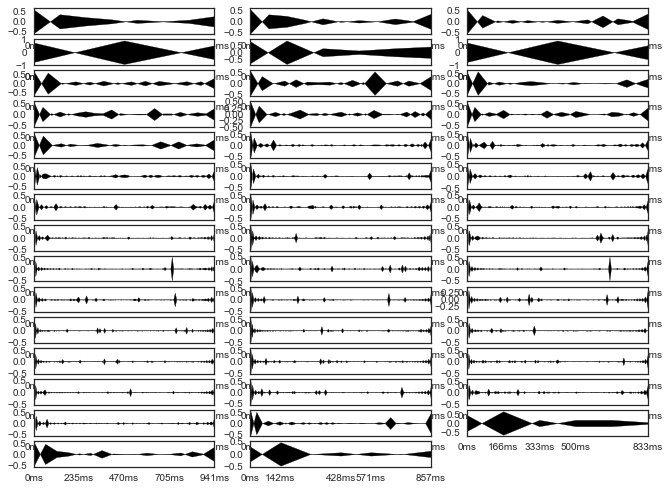

In [68]:
plt.figure(figsize=(11,9))

for i in range(len(all_month_G)):
    f = sc.fftpack.rfft(nx.normalized_laplacian_matrix(all_month_G[i]).todense()).mean(axis=1)
    fs = f.shape[0]
   
    plt.subplot(16, 3, i+1)
    lb.display.waveplot(f, fs,color='k')

In [73]:
for i in range(df_md.shape[1]):
    ax = fig.add_subplot(3,1,i+1)
    df_md[matrix_decomp[i]].plot.line(ax=ax, sharex=True, cmap='bone', rot=90, fontsize=8)
    
    for key,spine in ax.spines.items():
        spine.set_visible(False)
    ax.tick_params(bottom="off", top="off", left="off", right="off")
    ax.set_title("Plot of "+str(matrix_decomp[i]), fontsize=9)
    ax.set_xticks(np.arange(len(mth)),[i for i in mth]);
    plt.show()

In [70]:
mth_2k = ['jan_2k', 'feb_2k', 'mar_2k', 'apr_2k', 'may_2k', 'jun_2k', 'jul_2k', 'aug_2k', 'sep_2k', 'oct_2k',\
          'nov_2k', 'dec_2k']

In [71]:
def plot_audiowav(nt,name):
    plt.figure(figsize=(11,9))
    ln =  len(nt)
    
    for i in range(ln):
        f = sc.fftpack.rfft(nx.normalized_laplacian_matrix(nt[i]).todense()).mean(axis=1)
        fs = f.shape[0]
        
        plt.subplot(ln/2,2,i+1)
        lb.display.waveplot(f, fs,color='k',x_axis='time')
        plt.tight_layout()
        plt.title("Network Audio Waveform " + str(name[i]))

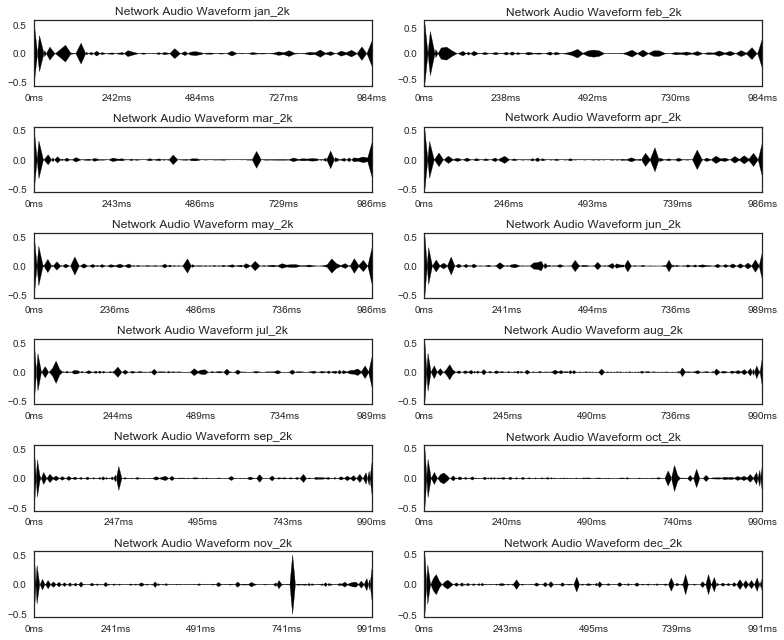

In [72]:
plot_audiowav(G_mth_2k,mth_2k)